<a href="https://colab.research.google.com/github/codyub/ESAA/blob/main/%ED%95%B8%EC%A6%88%EC%98%A8_3%EC%9E%A5_%EB%B6%84%EB%A5%98_p_127_154.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03 분류

# 3.1 MNIST
- 각 이미지에는 어떠한 숫자인지 레이블이 존재함. 

# MNIST 데이터셋 내려받기

In [1]:
from sklearn.datasets import fetch_openml
mnist=fetch_openml('mnist_784', version=1)
mnist.keys()

/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

- 비슷한 딕셔너리 구조를 갖고 있음
>- 데이터 셋을 설명하는 DESCR 키
>- 샘플이 하나의 행, 특성이 하나의 열로 구성된 배열을 가진 data 키
>- 레이블 배열을 담은 target 키



# 배열을 살펴보자

In [2]:
X, y=mnist['data'], mnist['target']
X.shape

(70000, 784)

- 이미지가 70,000개, 이미지의 특성은 784개 (28*28 픽셀)

In [3]:
y.shape

(70000,)

# 데이터 셋에서 이미지를 확인하자

In [4]:
# 실제 책의 코드는 오류가 나옴, 인덱싱이 되지 않아 X부터 오류
# import matplotlib as mpl
# import matplotlib.pyplot as plt

# some_digit=X[0]
# some_digit_image=np.array(some_digit).reshape(28,28)

# plt.imshow(some_digit_image, cmap='binary')
# plt.axis('off')
# plt.show()

In [5]:
type(X) # X의 데이터 타입은 데이터 프레임

pandas.core.frame.DataFrame

In [6]:
X.iloc[0,:] # 데이터 프레임의 인덱싱 방법을 사용

pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
pixel5      0.0
           ... 
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
pixel784    0.0
Name: 0, Length: 784, dtype: float64

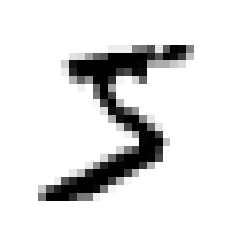

In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

some_digit=X.iloc[0,:]
some_digit_image=np.array(some_digit).reshape(28,28)

plt.imshow(some_digit_image, cmap='binary')
plt.axis('off')
plt.show()

- 숫자 5로 보이므로, 실제 레이블을 확인해보자

In [8]:
y[0]

'5'

- 레이블이 문자열로 되어 있으므로, y를 정수로 변환

In [9]:
y=y.astype(np.uint8)

# 데이터 조사 전 테스트 셋과 훈련 세트를 나누기
- 이미 앞 60,00개는 훈련, 테스트는 뒤 10,000개

In [10]:
X_train, X_test, y_train, y_test=X[:60000], X[60000:], y[:60000], y[60000:]

# 3.2 이진 분류기 훈련
- 예) 숫자 5만 식별 --> 5와 5 아님만 구별하는 이진 분류기의 한 예가 됨

# 분류 작업을 위해 타깃 백터 만들기

In [11]:
y_train_5 = (y_train==5) # 5는 true고, 다른 숫자는 모두 false
y_test_5 = (y_test==5)

# 분류 모델로 훈륜: 확률적 경사 하강법(SGD)
- 매우 큰 데이터셋을 효율적으로 처리하는 장점
- 한 번에 하나씩 훈련 샘플을 독립적로 처리하는 특징(온라인 학습에 적합)

In [12]:
from sklearn.linear_model import SGDClassifier

sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

# 이 모델을 사용해 숫자 5의 이미지를 감지

In [13]:
sgd_clf.predict([some_digit])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

# 3.3 성능 측정
- 분류기 평가는 회귀 모델보다 어려움
- 다양한 성능 지표가 존재

# 3.3.1 교차 검증을 사용한 정확도 측정

# 교차 검증 구현
- 사이킷런에서 제공하는 기능보다 교차 검증 과정을 더 많이 제어해야 할 필요가 있는 경우 교차 검증 기능을 직접 구현한다. 

In [14]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds=StratifiedKFold(n_splits=3, random_state=42, shuffle=True)

for train_index, test_index in skfolds.split(X_train, y_train_5):
  clone_clf=clone(sgd_clf)
  X_train_folds=X_train.iloc[train_index]
  y_train_folds=y_train_5.iloc[train_index]
  X_test_fold=X_train.iloc[test_index]
  y_test_fold=y_train_5.iloc[test_index]

  clone_clf.fit(X_train_folds, y_train_folds)
  y_pred=clone_clf.predict(X_test_fold)
  n_correct=sum(y_pred==y_test_fold)
  print(n_correct/len(y_pred)) # 0.9502, 0.96565, 0.96495 출력됨

0.9669
0.91625
0.96785


- 왜인지 책과 다르게 나왔지만 오래되서 그런 것 같다. 
- StratifiedKFold는 클래스별 비율이 유지되도록 폴드를 만들기 위해 계층적 샘플링을 수행한다. 매 반복에서 분류기 객체를 복제하여 훈련 폴드로 훈련시키고 테스트 폴드로 예측을 만든다. 그런 다음 올바른 예측의 수를 세어 정확한 예측의 비율을 출력한다.

# cross_val_score() 함수로 fold가 3개인 k-겹 교차검증을 사용해 SGDClassifier 모델을 평가
- k-겹 교차검증은 훈련 세트를 k개의 폴드로 나누고, 각 폴드에 대해 예측을 만들고 평가하기 위해 나머지 폴드로 훈련시킨 모델을 사용한다

In [15]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

# 모든 이미지를 '5 아님' 클래스로 분류하는 더미 분류기를 만들어 비교

In [16]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
  def fit(self, X, y=None):
    return self
  def predict(self, X):
    return np.zeros((len(X), 1), dtype=bool)

# 모델 정확도 추측

# 정확도를 분류기 성능 측정 지표로 선호하지 않는 이유: 불균형 데이터셋

In [17]:
never_5_clf=Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.91125, 0.90855, 0.90915])

- 이미지의 10%만이 5이기 때문에 무조건 5아님으로 예측하면 정확히 맞출 확률이 90%

# 3.3.2 오차 행렬
- 분류기의 성능 평가 방법
- 클래스 A의 샘플이 클래스 B로 분류된 횟수를 세는 것
- 오차 행렬을 만들기 위해서는 실제 타깃과 비교할 수 있도록 예측값을 만들어야 함
- 테스트 세트로 예측을 만들 수 있지만, 여기서는 안 함
- cross_val_predict() 함수 이용

In [18]:
from sklearn.model_selection import cross_val_predict

y_train_pred=cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

- k-fold 교차 검증을 수행하지만 평가 점수를 반환하지 않고, 각 테스트 폴드에서 얻은 예측을 반호나
- 즉, 훈련 샘플에 대해 깨끗한 예측을 얻게 됨(모델이 훈련하는 동안 보지 못했던 데이터에 대해 에측)

# confusion matrix() 함수를 통한 오차 행렬 만들기

In [19]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

- 행: 실제 클래스 / 열: 예측한 클래스
- 모두 제대로 분류 되었다면 오차 행렬의 주 대각성분만이 값을 갖게 됨

In [20]:
y_train_perfect_predictions = y_train_5 # 완벽한 분류기의 경우
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

# 양성 예측의 정확도: 정밀도 (TP/(TP+FP))
# 분류기가 정확하게 감지한 양성 샘플의 비율: 진양성 비율, 민감도, 재현율 (TP/(TP+FN))

# 3.3.3 정밀도와 재현율

In [21]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred) # == 3530/(3530+687)

0.8370879772350012

In [22]:
recall_score(y_train_5, y_train_pred) # == 3530/(3530+1891)

0.6511713705958311

# F1 score: 정밀도와 재현율의 조화평균 (2*(정밀도*재현율)/(정밀도+재현율))

In [23]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7325171197343846

- 정밀도와 재현율이 비슷한 분류기는 F1 점수가 높음
- 상황에 따라 정밀도나 재현율이 더 중요할 수 있음
예) 감시카메라를 통해 좀도둑 잡아내는 분류기 -> 재현율이 높다면 정확도가 매우 작아도 됨.
- 위 둘을 모두 얻을 수는 없음. 트레이드 오프 관계

# 3.3.4 정밀도/재현율 트레이드 오프
- SGD Classifier는 결정 함수를 사용해 각 샘플의 점수를 계산함. 
- 점수가 임곗값보다 크면, 샘플을 양성, 아니면 음성에 할당함. 
- 사이킷 런에서는 임곗값을 직접 지정할 수는 없지만, 예측에 사용한 점수는 확인할 수 있다. 
- decision_function() 메서드를 predict()대신 호출 --> 각 샘플의 점수 얻음 --> 원하는 임계값을 정해 예측 만들기 가능

In [24]:
y_scores=sgd_clf.decision_function([some_digit])
y_scores

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([2164.22030239])

In [25]:
threshold=0
y_some_digit_pred=(y_scores>threshold) 
y_some_digit_pred # True 반환

array([ True])

In [26]:
threshold=8000
y_some_digit_pred=(y_scores>threshold)
y_some_digit_pred #False 반환

array([False])

- 임계값을 높이면 재현율이 줄어든다는 것을 보여줌. 
- 적절한 임계값은?

# 적절한 임계값 정하기: cross_val_predict()
- 훈련 세트에 있는 모든 샘플의 점수 구하기 -> 예측 결과가 아닌 점수를 반환 받도록 함 -> 정밀도와 재현율 계산

In [27]:
y_scores=cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method='decision_function')

In [28]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

# 정밀도와 재현율 함수 그리기

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 48128 (\N{HANGUL SYLLABLE MIL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 51116 (\N{HANGUL SYLLABLE JAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 54788 (\N{HANGUL SYLLABLE HYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPy

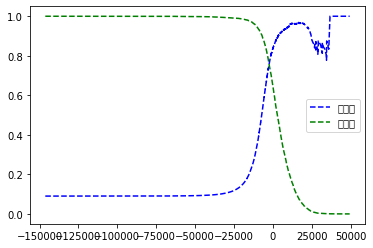

In [29]:
def plot_precision_recall_vs_threshold(precision, recalls, thresholds):
  plt.plot(thresholds, precisions[:-1], 'b--', label='정밀도')
  plt.plot(thresholds, recalls[:-1], 'g--', label='재현율')
  plt.legend() # 임계값을 표시하고 범례, 축 이름, 그리드를 추가

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

- 정밀도 곡선이 재현율 곡선보다 울퉁불퉁함 --> 임계값을 올리더라도 정밀도가 낮아질 때가있음.
- 파랑: 정밀도 / 초록: 재현율

# 좋은 정밀도/재현율 트레이드 오프를 선택하는 방법2: 재현율에 대한 정밀도 곡선을 그리기

In [30]:
threshold_90_precision = thresholds[np.argmax(precisions>=0.90)]
threshold_90_precision

3370.019499143958

- 훈련 세트에 대한 예측을 만들려면 분류기의 predict() 메서드를 호출하는 대신 다음 코드 실행

In [31]:
y_train_pred_90=(y_scores >= threshold_90_precision)

# 이 예측에 대한 정밀도와 재현율을 확인

In [32]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [33]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

# 3.3.5 ROC 곡선(수신기 조작 특성)
- FPR에 대한 TPR의 곡선 = 민감도(재현율)에 대한 1-특이도 그래프
- 먼저 roc_curve() 함수를 이용해 여러 임계값에서 값을 계산해야 함

In [34]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

# 곡선을 나타내기

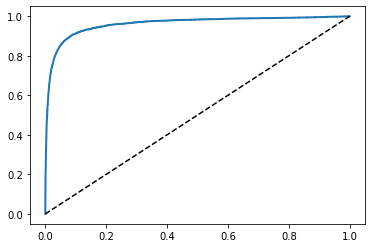

In [35]:
def plot_roc_curve(fpr, tpr, label=None):
  plt.plot(fpr, tpr, linewidth=2, label=label)
  plt.plot([0,1], [0,1], 'k--') #대각 점선
  
plot_roc_curve(fpr, tpr)
plt.show()

- 트레이드 오프: 재현율이 높을수록 분류기가 만드는 거짓 양성(FPR)이 늘어남
- 점선은 완전한 랜덤 분류기의 ROC 곡선을 뜻함
- 좋은 분류기는 이 점선에서 최대한 멀리 떨어져 있어야 함


# 곡선 아래 면적(AUC) 측정: 분류기 비교 (완벽할수록 1에 가까움, 랜덤할수록 0.5에 가까움)

In [36]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

# Randomforest를 훈련시켜 SGD의 ROC 곡선과 ROC AUC 점수를 비교하기
- Randomforestclassifier에는 decision_function() 메서드가 없는 대신 predict_proba() 메서드가 있음
- 사이킷런 분류기는 일반적으로 두 메서드 모두 있음
- predict_proba(): 샘플이 행, 클래스가 열, 샘플이 주어진 클래스에 속할 확률을 담은 배열 반환

In [37]:
from sklearn.ensemble import RandomForestClassifier

forest_clf=RandomForestClassifier(random_state=42)
y_probas_forest=cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method='predict_proba')

# 확률을 점수로 사용해 roc_curve 곡선 그리기

In [38]:
y_scores_forest=y_probas_forest[:,1] 
fpr_forest, tpr_forest, thresholds_forest=roc_curve(y_train_5, y_scores_forest)

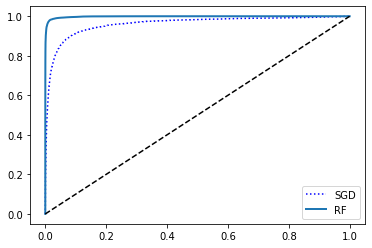

In [39]:
#이제 ROC 그려보자. 비교를 위해 첫번째 ROC도 그리자.
plt.plot(fpr, tpr, 'b:', label='SGD')
plot_roc_curve(fpr_forest, tpr_forest, 'RF')
plt.legend(loc='lower right')
plt.show()

- Randomforestclassifier의 ROC 곡선이 왼쪽 위 모서리에 더 가까워 SGD보다 훨씬 좋아 보임

In [40]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

- 정밀도와 재현율 점수를 계산

# 3.4 다중 분류 (다항 분류기)
- SDG, 랜덤 포레스트, 나이브 베이즈 등: 여러 개의 클래스를 직접 처리 가능
- 로지스틱, 서포트 벡터 등: 이진 분류만 가능
- 이진 분류기를 여러 개 사용해 다중 클래스를 분류하는 기법도 존재함
- OvR(A): 각 분류기의 결정 점수 중 가장 높은 것을 클래스로 선택 -> 이진 분류 알고리즘이 선호
- OvO: 각 숫자의 조합마다 이진 분류기를 훈련 -> N개 클래스가 있다면, N*(N-1)/2 개의 분류기가 필요 --> MINIST 문제에서는 45개의 분류기를 훈련시켜야 함 

# 서포트 백터 머신 분류기 테스트

In [41]:
from sklearn.svm import SVC
svm_clf=SVC()
svm_clf.fit(X_train, y_train) # 이제 y_train_5가 아니고, y_train 사용
svm_clf.predict([some_digit])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([5], dtype=uint8)

- 원래 타깃 클래스(0~9) 를 사용해 훈련
- 예측을 하나 만들었음 (정확!)
- 내부에서는 사이킷런이 OvO 전략을 사용해 10개의 이진 분류기를 훈련시키고 각각의 결정 점수를 얻어 점수가 가장 높은 클래스를 선택

# OvO 전략을 사용하고 있는지 확인
- decision_functino() 메서드 : 샘플 당 10개의 점수를 반환(클래스마다 하나씩의 점수)

In [42]:
some_digit_scores=svm_clf.decision_function([some_digit])
some_digit_scores

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

- 가장 높은 점수인 9.3이 클래스 5에 해당하는 값

In [43]:
np.argmax(some_digit_scores)

5

In [44]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [45]:
svm_clf.classes_[5]

5

# 사이킷 런에서 OvO나 OvR을 사용하도록 강제: OneVsOneClassifier나 OneVsRestCllassifier 사용
- 이진 분류기 인스턴스를 만들어 객체를 생성할 때 전달함

# SVC 기반으로 OvR 전략을 사용하는 다중 분류기

In [46]:
from sklearn.multiclass import OneVsRestClassifier
ovr_clf=OneVsRestClassifier(SVC())
ovr_clf.fit(X_train, y_train)
ovr_clf.predict([some_digit])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local

array([5], dtype=uint8)

In [47]:
len(ovr_clf.estimators_)

10

# SGD 훈련시키기

In [48]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([3], dtype=uint8)

- SGD는 직접 샘플을 다중 클래스로 분류할 수 있기 때문에, 별도로 사이킷런의 OvR이나 OvO를 적용할 필요가 없다.
- decision_function() 메서드는 클래스마다 하나의 값을 반환 

# SGD 분류기가 클래스마다 부여한 점수를 확인

In [49]:
sgd_clf.decision_function([some_digit])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

- 이 분류기가 예측 결과에 강한 확신을 보임
- 대부분의 점수가 큰 음수, 클래스 5의 점수는 2412.5 --> 이 모델은 클래스 3을 조금 의심하고 있음

# 분류기 평가: 교차검증
- SGD의 정확도 평가

In [50]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring='accuracy')

array([0.87365, 0.85835, 0.8689 ])

- 랜덤 분류기의 경우 10% 정확도를 얻었을 것이므로, 이 점수가 나쁘지 않지만, 더 높일 여지가 있음 --> 스케일 조정

In [51]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring='accuracy')

array([0.8983, 0.891 , 0.9018])

# 3.5 에러 분석

- 실제 프로젝트
1) 데이터 준비 단계에서 가능한 선택 사항 탐색
2) 여러 모델 시도
3) 가장 좋은 몇 개를 골라 그리드서치를 이용해 하이퍼 파라미터를 튜닝
4) 자동화

- 가장 높은 모델을 찾았다는 가정하에 모델의 성능을 향상 시킬 방법을 찾기: 에러의 종류를 분석

# 오차 행렬 살펴보기: cross_val_predict(), confusion_matrix() 함수 호출

In [52]:
y_train_pred=cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx=confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]])

- matplotlib 의 matshow() 함수를 사용해 이미지로 표현

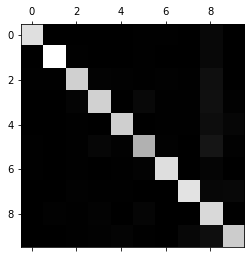

In [53]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

- 이 오차행렬은 대부분 이미지가 올바르게 분류되었음을 나타내는 주대각선에 있으므로 좋아보임
- 숫자 5는 흐릿해 보임: 이미지가 적거나 분류기가 숫자 5를 다른 숫자만큼 잘 분류하지 못한다는 의미

# 에러 비율 비교
- 오차 행렬의 각 값을 대응되는 클래스의 이미지 개수로 나눠(에러의 절대 개수가 아니라) 에러 비율을 비교한다(개수로 비교하면 이미지가 많은 클래스가 상대적으로 나쁘게 보임)

In [54]:
row_sums=conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx=conf_mx/row_sums

# 다른 항목은 그대로 유지하고 주대각선만 0으로 채워서 그래프 그리기

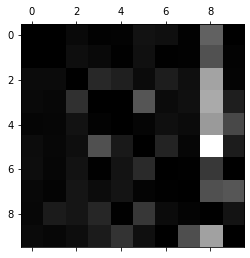

In [55]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

- 행은 실제 클래스, 열은 예측한 클래스
- 클래스 8의 열이 상당히 밝으므로 많은 이미지가 8로 잘못 분류 되었음을 암시
- 하지만 클래스 8의 행은 괜찮음 = 실제 8은 적절히 8로 분류됨
- 오차 행렬은 반드시 대칭인 것은 아님
- 3,5가 많이 혼동되고 있는 것을 볼 수 있음
- 8을 잘못 분류되는 것을 줄이도록 개선할 필요가 있다 --> 8이 아닌 8처럼 보이는 숫자 훈련 데이터를 더 많이 모아서 실제 8과 구분하도록 분류기를 학습시킬 수 있다.(예. 동심원의 수를 세는 알고리즘)
- 개개의 에러를 분석해보면 분류기가 무슨 일을 하고, 왜 잘못되었는지 알 수 있다.
- plot_digits()는 단순히 맷플롯립의 inshow() 함수를 사용하는 함수

In [62]:
# 숫자 그림을 위한 함수
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    # n_rows = ceil(len(instances) / images_per_row) 와 동일
    n_rows = (len(instances) - 1) // images_per_row + 1

    # 필요하면 그리드 끝을 채우기 위해 빈 이미지를 추가
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    # 배열의 크기를 바꾸어 28×28 이미지를 담은 그리드로 구성
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    # 축 0(이미지 그리드의 수직축)과 2(이미지의 수직축)를 합치고 축 1과 3(두 수평축)을 합침
    # 먼저 transpose()를 사용해 결합하려는 축을 옆으로 이동한 다음 합침
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    # 하나의 큰 이미지를 얻었으므로 출력
    plt.imshow(big_image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

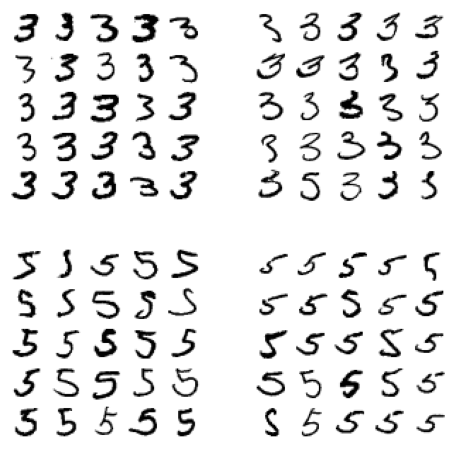

In [63]:
cl_a, cl_b=3,5
X_aa=X_train[(y_train==cl_a)&(y_train_pred==cl_a)]
X_ab=X_train[(y_train==cl_a)&(y_train_pred==cl_b)]
X_ba=X_train[(y_train==cl_b)&(y_train_pred==cl_a)]
X_bb=X_train[(y_train==cl_b)&(y_train_pred==cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa.iloc[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab.iloc[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba.iloc[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb.iloc[:25], images_per_row=5)
plt.show()

- 왼쪽의 두 개는 3으로 분류된 이미지, 오른쪽 두 개는 5로 분류된 이미지
- 분류기가 잘못 분류한 숫자 일ㄹ부는 정말 잘못 쓰인 부분이 있기도 함
- 대부분은 분류기가 실수한 이유를 알기 어렵다 --> 원인: 선형모델인 SGD 사용했기 때문에, 선형 분류기는 클래스마다 픽셀에 가중치를 할당하고 새로운 이미지에 대해 단순히 픽셀 강도의 가중치 합을 클래스의 점수로 계산하므로, 3과 5는 몇 개의 픽셀만 다르기 때문에 모델이 쉽게 혼동함
- 이미지를 중앙에 위치시키고 회전되어 있지 않도록 전처리 하면 에러가 줄어들 것

# 3.6 다중 레이블 분류
- 지금까지 각 샘플이 하나의 클래스에만 할당됨
- 하지만 분류기가 샘플마다 여러 개의 클래스를 출력해야 할 때도 있음
- 예를 들어 두 사람이 함께 있는 사진을 본다면 [1,1]: [있음, 있음] 출력을 해야 함
- 다중 레이블 분류 시스템: 여러 개의 이진 꼬리표를 출력하는 분류 시스템

In [64]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large=(y_train>=7)
y_train_odd=(y_train%2==1)
y_multilabel=np.c_[y_train_large, y_train_odd]

knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

- 위 코드는 각 숫자 이미지에 두 개의 타깃 레이블이 담긴 y_multilabel 배열을 만든다.
- 큰 값(7,8,9) / 홀수인지 / KNN 인스턴스 만들고 다중 타깃 배열을 사용해 훈련

# 예측 만들기

In [65]:
knn_clf.predict([some_digit])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([[False,  True]])

- 5는 7보다 작고, 홀수라는 것을 함께 보여줌을 알 수 있다
- 다중 레이블 분류기의 평가 방법은 프로젝트에 따라 다르다.

# F1 점수를 구하기
- F1 점수를 구하고, 간단하게 평균 점수를 계산, 다음 코드는 모든 레이블에 대한 F1 점수의 평균을 계산

In [66]:
y_train_knn_pred=cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average='macro')

0.976410265560605

- 이 코드는 모든 레이블의 가중치가 같다고 가정한 것
- 가중치를 주기 위해서는 average = "weight"

# 3.7 다중 출력 분류
- 다중 레이블 분류에서 한 레이블이 다중 클래스가 될 수 있도록 일반화한 것(즉, 값을 두 개 이상 가질 수 있다)


#MNIST에 잡음 추가

In [67]:
noise=np.random.randint(0,100,(len(X_train), 784))
X_train_mod=X_train+noise
noise=np.random.randint(0,100,(len(X_test), 784))
X_test_mod=X_test+noise
y_train_mod=X_train
y_test_mod=X_test

# 분류기 훈련으로 이미지를 깨끗하게 만들기

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


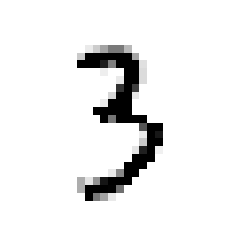

In [69]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit=knn_clf.predict([X_test_mod.iloc[30]])
plot_digits(clean_digit)